In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

nit = pd.read_csv('/content/Customer-Churn-Prediction.csv')
nit.head(300)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    7590-VHVEG  Female              0     Yes         No       1   
1    5575-GNVDE    Male              0      No         No      34   
2    3668-QPYBK    Male              0      No         No       2   
3    7795-CFOCW    Male              0      No         No      45   
4    9237-HQITU  Female              0      No         No       2   
..          ...     ...            ...     ...        ...     ...   
295  8203-XJZRC    Male              0      No         No       1   
296  6556-DBKZF  Female              0     Yes        Yes      71   
297  6851-WEFYX    Male              1     Yes         No      35   
298  2985-JUUBZ    Male              0     Yes        Yes      40   
299  6390-DSAZX  Female              0      No        Yes       1   

    PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             No  No phone service             DSL                   No  ...   
1            Yes                No             DSL                  Yes  ...   
2            Yes                No             DSL                  Yes  ...   
3             No  No phone service             DSL                  Yes  ...   
4            Yes                No     Fiber optic                   No  ...   
..           ...               ...             ...                  ...  ...   
295          Yes                No              No  No internet service  ...   
296          Yes                No     Fiber optic                   No  ...   
297          Yes               Yes     Fiber optic                   No  ...   
298          Yes               Yes             DSL                   No  ...   
299          Yes                No     Fiber optic                  Yes  ...   

        DeviceProtection          TechSupport          StreamingTV  \
0                     No                   No                   No   
1                    Yes                   No                   No   
2                     No                   No                   No   
3                    Yes                  Yes                   No   
4                     No                   No                   No   
..                   ...                  ...                  ...   
295  No internet service  No internet service  No internet service   
296                  Yes                   No                   No   
297                  Yes                   No                  Yes   
298                  Yes                   No                  Yes   
299                   No                   No                   No   

         StreamingMovies        Contract PaperlessBilling  \
0                     No  Month-to-month              Yes   
1                     No        One year               No   
2                     No  Month-to-month              Yes   
3                     No        One year               No   
4                     No  Month-to-month              Yes   
..                   ...             ...              ...   
295  No internet service  Month-to-month               No   
296                   No        Two year               No   
297                  Yes  Month-to-month              Yes   
298                  Yes  Month-to-month              Yes   
299                   No  Month-to-month              Yes   

                 PaymentMethod MonthlyCharges  TotalCharges Churn  
0             Electronic check          29.85         29.85    No  
1                 Mailed check          56.95        1889.5    No  
2                 Mailed check          53.85        108.15   Yes  
3    Bank transfer (automatic)          42.30       1840.75    No  
4             Electronic check          70.70        151.65   Yes  
..                         ...            ...           ...   ...  
295               Mailed check          20.25         20.25    No  
296           Electronic check          76.05       5436.45    No  
297           Electronic chec

In [ ]:
nit.shape

(7043, 21)

In [ ]:
nit.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162289    32.370865       64.761692
std         0.368742    24.559231       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
nit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
nit.corr()

SeniorCitizen   tenure  MonthlyCharges
SeniorCitizen        1.000000  0.01609        0.219856
tenure               0.016090  1.00000        0.247890
MonthlyCharges       0.219856  0.24789        1.000000

In [ ]:
nit.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
nit.loc[: , :]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
nit.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
nit.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
print(nit['MonthlyCharges'].unique ())

[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


In [ ]:
nit['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
nit['TotalCharges'].value_counts() > 30

          False
20.2      False
19.75     False
20.05     False
19.9      False
          ...  
6849.4    False
692.35    False
130.15    False
3211.9    False
6844.5    False
Name: TotalCharges, Length: 6531, dtype: bool

In [ ]:
nit0 = nit[nit['tenure'] == 0]

In [ ]:
nit1 = nit[nit['tenure'] == 1]

In [ ]:
nit_DSL = nit[nit['InternetService'] == 2]
nit_DSL

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [ ]:
nit.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
nit['MonthlyCharges'].mean()

64.76169246059918

In [ ]:
pd.DataFrame(nit['Contract'])

Contract
0     Month-to-month
1           One year
2     Month-to-month
3           One year
4     Month-to-month
...              ...
7038        One year
7039        One year
7040  Month-to-month
7041  Month-to-month
7042        Two year

[7043 rows x 1 columns]

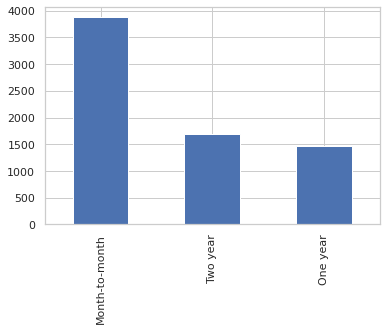

In [ ]:
nit['Contract'].value_counts().plot.bar()

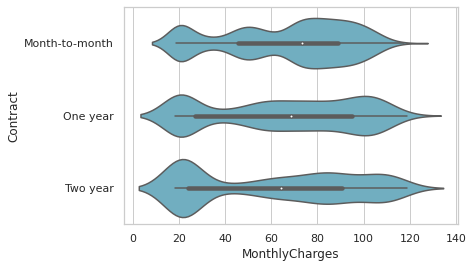

In [ ]:
sns.violinplot(x= 'MonthlyCharges', y='Contract', data= nit, color='c')

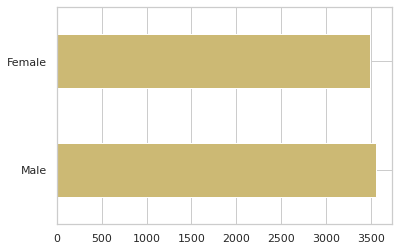

In [ ]:
nit['gender'].value_counts().plot.barh(color='y')

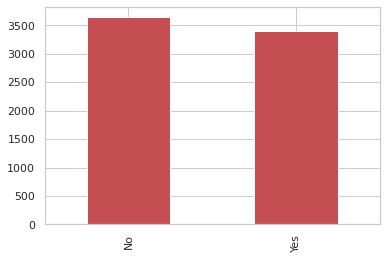

In [ ]:
nit['Partner'].value_counts().plot.bar(color='r')

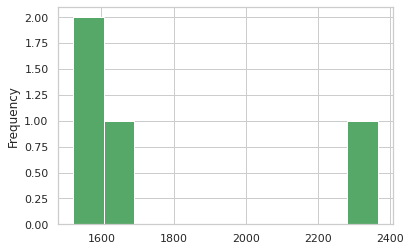

In [ ]:
nit['PaymentMethod'].value_counts().plot.hist(color='g')

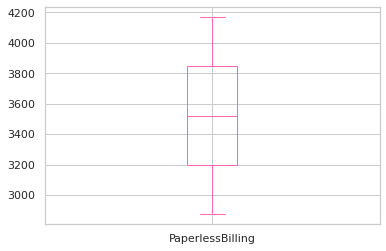

In [ ]:
nit['PaperlessBilling'].value_counts().plot.box(color='hotpink')

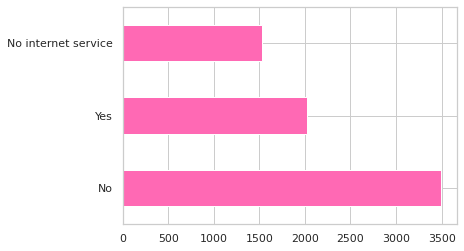

In [ ]:
nit['OnlineSecurity'].value_counts().plot.barh(color='hotpink', width=0.5)

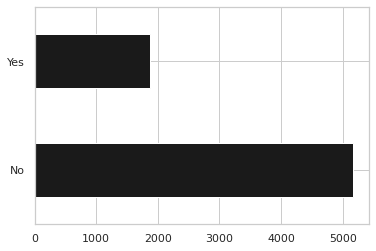

In [ ]:
nit['Churn'].value_counts().plot.barh(color='k', width=0.5)

In [ ]:
nit.head(15)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   

       MultipleLines InternetService       OnlineSecurity  ...  \
0   No phone service             DSL                   No  ...   
1                 No             DSL                  Yes  ...   
2                 No             DSL                  Yes  ...   
3   No phone service             DSL                  Yes  ...   
4                 No     Fiber optic                   No  ...   
5                Yes     Fiber optic                   No  ...   
6                Yes     Fiber optic                   No  ...   
7   No phone service             DSL                  Yes  ...   
8                Yes     Fiber optic                   No  ...   
9                 No             DSL                  Yes  ...   
10                No             DSL                  Yes  ...   
11                No              No  No internet service  ...   
12               Yes     Fiber optic                   No  ...   
13               Yes     Fiber optic                   No  ...   
14                No     Fiber optic                  Yes  ...   

       DeviceProtection          TechSupport          StreamingTV  \
0                    No                   No                   No   
1                   Yes                   No                   No   
2                    No                   No                   No   
3                   Yes                  Yes                   No   
4                    No                   No                   No   
5                   Yes                   No                  Yes   
6                    No                   No                  Yes   
7                    No                   No                   No   
8                   Yes                  Yes                  Yes   
9                    No                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                  Yes                   No                  Yes   
13                  Yes                   No                  Yes   
14                  Yes                  Yes                  Yes   

        StreamingMovies        Contract PaperlessBilling  \
0                    No  Month-to-month              Yes   
1                    No        One year               No   
2                    No  Month-to-month              Yes   
3                    No        One year               No   
4                    No  Month-to-month              Yes   
5                   Yes  Month-to-month              Yes   
6                    No  Month-to-month              Yes   
7                    No  Month-to-month               No   
8    

In [ ]:
fig= px.histogram(nit, x='InternetService' , width=900, height=500, template='plotly_dark')
fig.show()

In [125]:
fig= px.histogram(nit, x='StreamingTV' , width=900, height=500, template='simple_white')
fig.show()

In [ ]:
fig= px.histogram(nit, x='TotalCharges' , width=900, height=500, template='ggplot2')
fig.show()

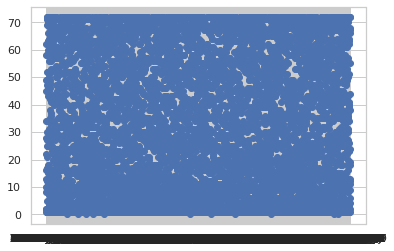

In [ ]:
plt.scatter(nit['customerID'] , nit['tenure'])
plt.show()

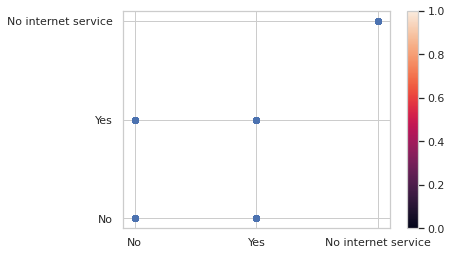

In [ ]:

plt.scatter(nit['OnlineSecurity'] , nit['StreamingMovies'])
plt.colorbar()
plt.show()

In [ ]:
fig= px.histogram(nit, x='OnlineSecurity' ,width= 900,height=500, template='seaborn')
fig.show()

In [ ]:
fig= px.histogram(nit, x='StreamingMovies' ,width= 900,height=500, template='simple_white', color_discrete_sequence=['salmon'])
fig.show()

In [122]:
nit['gender'].unique()

array(['Female', 'Male'], dtype=object)

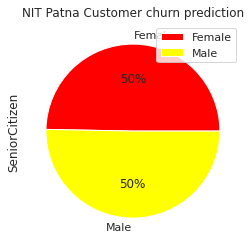

In [118]:
samina.groupby(['gender']).sum().plot(kind='pie', y='SeniorCitizen', title='NIT Patna Customer churn prediction', colors=['red', 'yellow'], autopct='%1.0f%%')

In [119]:

fig= px.histogram(nit, x='tenure' ,width= 900,height=500, template='simple_white', color='Partner', color_discrete_sequence=['purple','pink'])
fig.show()

In [121]:
fig= px.histogram(nit, x='MonthlyCharges' ,width= 900,height=500, template='simple_white', color='Partner', color_discrete_sequence=['red','yellow'])
fig.show()

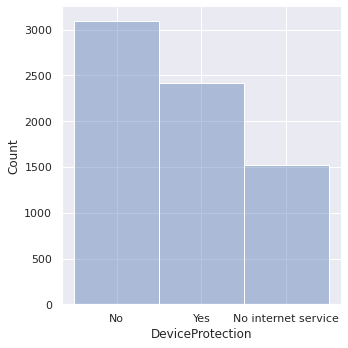

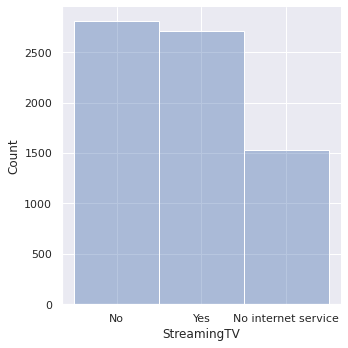

In [124]:
sns.set(style="darkgrid")
sns.displot(data=nit, x='DeviceProtection', bins=13, alpha=0.4, palette="Dark2");
sns.displot(data=nit, x='StreamingTV', bins=13, alpha=0.4)

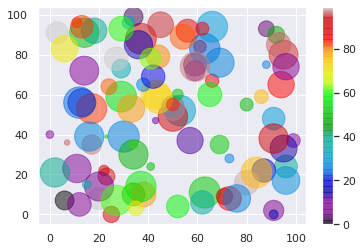

In [126]:
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()
plt.show()